In [3]:
%matplotlib notebook
import numpy as np
import helpers
import pandas as pd
import matplotlib as mpl
import scipy.signal
import mne

mpl.rcParams['figure.max_open_warning'] = 30

# load container for plotting
evoked = helpers.load_evoked_container(window=[0, 0.9])

    Read a total of 6 projection items:
        grad_ssp_upright2.fif : PCA-v1 (1 x 306)  idle
        grad_ssp_upright2.fif : PCA-v2 (1 x 306)  idle
        grad_ssp_upright2.fif : PCA-v3 (1 x 306)  idle
        mag_ssp_upright2.fif : PCA-v1 (1 x 306)  idle
        mag_ssp_upright2.fif : PCA-v2 (1 x 306)  idle
        mag_ssp_upright2.fif : PCA-v3 (1 x 306)  idle
480 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 6)
0 bad epochs dropped
tmax is not in epochs time interval. tmax is set to epochs.tmax


/home/bitzer/ZIH/gitrepos/BeeMEG/helpers.py:412: RuntimeWarning: tmax is not in epochs time interval. tmax is set to epochs.tmax
  epochs = epochs.crop(*window)


In [4]:
# plotting function
times=np.linspace(0.4, 0.7, 8)
def plot_topo(data, times=np.linspace(0.4, 0.7, 8), scale=1, 
              vmin=None, vmax=None, cmap=None, unit=None, regressors=None):
    
    if regressors is None:
        regressors = data.columns
        
    for reg in regressors:
        evoked.data = data[reg].values.reshape(evoked.data.shape)
        evoked.comment = reg
    
        fig = evoked.plot_topomap(times, scale=scale, vmin=vmin, vmax=vmax, 
                                  cmap=cmap, unit=unit, image_interp='nearest', 
                                  title=reg)
        fig.set_label(reg)
        

# Note that these are not exactly the t-values underlying the negative log10 p-values 
# stored in second_level, because scipy.stats uses a different denominator when 
# computing variances and standard deviations than the default used by numpy 
# (N-1 in scipy.stats vs. N in numpy default).
def get_tvals(second_level):
    tvals = (second_level.xs('mean', axis=1, level='measure')  / 
             second_level.xs('std', axis=1, level='measure') * np.sqrt(34))
    
    return tvals

# Summary statistic approach

In [5]:
second_level = pd.read_hdf(helpers.resultsdir + '/meg_hierarchical_ss_bl_long_1to5.h5', 'second_level')
tvals = get_tvals(second_level)
second_level.xs('mlog10p', axis=1, level='measure').describe()

regressor,dot_x_1,dot_x_2,dot_x_3,dot_x_4,dot_x_5,dot_y_1,dot_y_2,dot_y_3,dot_y_4,dot_y_5,entropy,intercept,surprise_1,surprise_2,surprise_3,surprise_4,surprise_5,trial_time
count,9.180000e+03,9180.000000,9180.000000,9180.000000,9180.000000,9180.000000,9180.000000,9180.000000,9180.000000,9180.000000,9180.000000,9180.000000,9180.000000,9180.000000,9180.000000,9180.000000,9180.000000,9180.000000
mean,1.405033e+00,1.119645,1.232999,1.091187,1.097603,0.850598,0.827519,0.683824,0.773495,0.671675,0.606246,0.805476,0.550678,0.662588,0.739913,0.579193,0.588944,0.449308
std,1.664916e+00,1.438753,1.553191,1.455378,1.560956,1.019621,1.059377,0.949515,0.950399,0.826415,0.638298,0.833405,0.565218,0.721353,0.890568,0.615441,0.641951,0.441709
min,3.292004e-07,0.000044,0.000014,0.000090,0.000003,0.000034,0.000004,0.000023,0.000126,0.000097,0.000042,0.000032,0.000001,0.000145,0.000003,0.000266,0.000068,0.000009
25%,2.695641e-01,0.214329,0.234123,0.214511,0.192231,0.188783,0.190630,0.141557,0.174287,0.158757,0.153276,0.213153,0.143930,0.173028,0.176768,0.156526,0.154394,0.123079
50%,7.822269e-01,0.577996,0.632161,0.560301,0.504078,0.486463,0.477495,0.359447,0.449832,0.396204,0.387306,0.537724,0.361860,0.434045,0.448172,0.389760,0.382230,0.307568
75%,1.878502e+00,1.390666,1.587254,1.344383,1.262518,1.114449,1.000277,0.804094,1.000928,0.857386,0.837230,1.122297,0.760863,0.900147,0.962360,0.797389,0.790745,0.631594
max,1.185638e+01,9.569463,11.656929,11.711354,11.851768,8.617275,9.581965,8.433548,7.682570,7.136631,5.647252,6.767277,3.866631,7.376864,10.677171,5.942617,5.797171,3.525876


In [6]:
second_level_perm = pd.read_hdf(helpers.resultsdir + 
                                '/meg_hierarchical_ss_bl_long_1to5_permuted.h5', 'second_level')
second_level_perm2 = pd.read_hdf(helpers.resultsdir + 
                                '/meg_hierarchical_ss_bl_long_1to5_permuted2.h5', 'second_level')
second_level_perm.xs('mlog10p', axis=1, level='measure').describe()

regressor,dot_x_1,dot_x_2,dot_x_3,dot_x_4,dot_x_5,dot_y_1,dot_y_2,dot_y_3,dot_y_4,dot_y_5,entropy,intercept,surprise_1,surprise_2,surprise_3,surprise_4,surprise_5,trial_time
count,9180.000000,9180.000000,9180.000000,9180.000000,9180.000000,9180.000000,9180.000000,9180.000000,9180.000000,9180.000000,9180.000000,9180.000000,9180.000000,9180.000000,9180.000000,9180.000000,9180.000000,9180.000000
mean,0.507979,0.483428,0.498909,0.514039,0.485792,0.484130,0.531959,0.520005,0.507392,0.508452,0.474976,0.793798,0.481001,0.499753,0.500550,0.509918,0.497841,0.402789
std,0.514150,0.488043,0.530521,0.542155,0.481009,0.510214,0.540502,0.526432,0.516670,0.538032,0.480427,0.854048,0.487296,0.506703,0.516217,0.545724,0.507986,0.392429
min,0.000018,0.000048,0.000065,0.000040,0.000055,0.000007,0.000019,0.000049,0.000072,0.000017,0.000051,0.000116,0.000119,0.000071,0.000035,0.000018,0.000065,0.000097
25%,0.141736,0.136195,0.132764,0.140126,0.140634,0.137871,0.149214,0.149181,0.141893,0.142851,0.135500,0.191801,0.133535,0.136250,0.139810,0.136751,0.135439,0.117788
50%,0.350596,0.338433,0.331750,0.337979,0.336563,0.325063,0.363082,0.357096,0.343255,0.346612,0.322756,0.508000,0.322220,0.343538,0.339562,0.332680,0.337173,0.281602
75%,0.702820,0.664462,0.676112,0.695594,0.678817,0.646909,0.733386,0.720466,0.701310,0.693131,0.654893,1.097617,0.676541,0.696867,0.694107,0.699701,0.689579,0.561712
max,4.582098,4.851709,4.813155,3.947153,3.751506,4.962195,5.224381,5.299645,4.130891,6.826357,3.967102,8.111590,4.319278,4.938141,6.711483,6.078055,4.433881,3.318566


## Raw measures for selected regressors
Note that these are not exactly the t-values underlying the negative log10 p-values stored in second_level, because scipy.stats uses a different denominator when computing variances and standard deviations than the default used by numpy (N-1 in scipy.stats vs. N in numpy default).

### maximum across channels

<IPython.core.display.Javascript object>


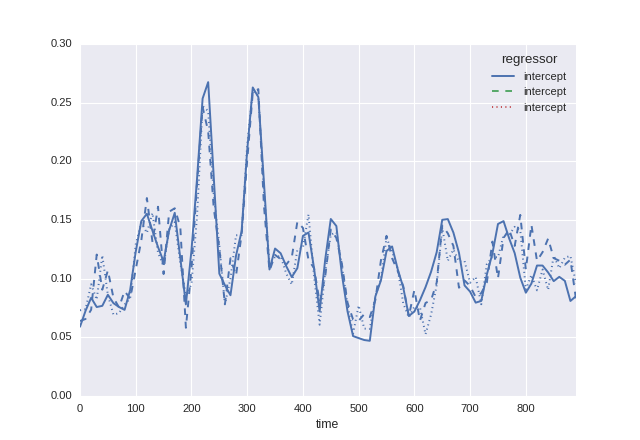

In [58]:
measure = 'mean'
reg = ['intercept']
ax = second_level.xs(measure, axis=1, level='measure').max(level='time').plot(
                     y=reg);
cols = [l.get_color() for l in ax.get_lines()]
second_level_perm.xs(measure, axis=1, level='measure').max(level='time').plot(
                     y=reg, ax=ax, style=['--'] * len(reg))
second_level_perm2.xs(measure, axis=1, level='measure').max(level='time').plot(
                      y=reg, ax=ax, style=[':'] * len(reg))
lines = ax.get_lines()
for i in range(len(reg)):
    col = lines[i].get_color()
    lines[i+len(reg)].set_color(col)
    lines[i+2*len(reg)].set_color(col)
    

<IPython.core.display.Javascript object>


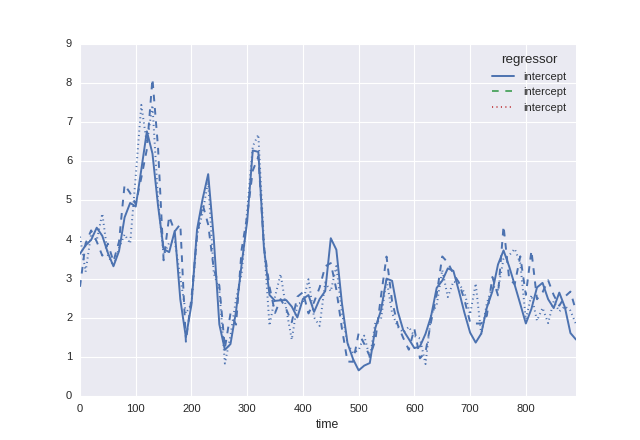

In [59]:
measure = 'mlog10p'
ax = second_level.xs(measure, axis=1, level='measure').max(level='time').plot(
                     y=reg);
cols = [l.get_color() for l in ax.get_lines()]
second_level_perm.xs(measure, axis=1, level='measure').max(level='time').plot(
                     y=reg, ax=ax, style=['--'] * len(reg))
second_level_perm2.xs(measure, axis=1, level='measure').max(level='time').plot(
                      y=reg, ax=ax, style=[':'] * len(reg))
lines = ax.get_lines()
for i in range(len(reg)):
    col = lines[i].get_color()
    lines[i+len(reg)].set_color(col)
    lines[i+2*len(reg)].set_color(col)

<IPython.core.display.Javascript object>


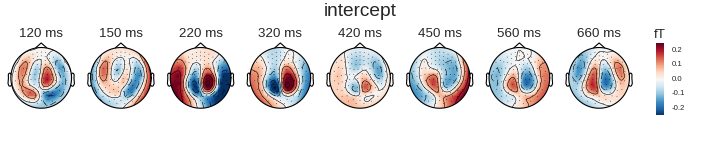

In [31]:
times = [0.12, 0.15, 0.22, 0.32, 0.42, 0.45, 0.56, 0.66]
plot_topo(second_level.xs('mean', axis=1, level='measure'), times, 
          vmin=-0.2, vmax=0.2, regressors=reg)

## Aligning effects of the different dots

In [6]:
def align_regressors(data, r_name):
    aligned = np.c_[[data.loc[d*100:d*100+490, r_name+'_%d' % (d+1)] for d in range(5)]].T
    aligned = pd.DataFrame(aligned, columns=[r_name+'_%d' % d for d in range(1, 6)], 
            index=pd.Index(np.arange(0, 500, 10), name='time after dot onset (ms)'))
    
    return aligned

def show_aligned_effects(r_name, measure):
    data = second_level.xs(measure, axis=1, level='measure').max(level='time')
    aligned = align_regressors(data, r_name)
    ax = aligned.plot(title=measure);
    ax.plot(aligned.mean(axis=1), '--', color='0', lw=2, label='mean')
    ax.legend()

    # identify local maxima
    times = aligned.index[scipy.signal.argrelextrema(aligned.mean(axis=1).values, 
                                                     np.greater, order=4)] / 1000
    
    tvals_aligned = pd.concat([align_regressors(tvals.loc[channel], r_name) 
                           for channel in tvals.index.levels[0]], 
                          keys=tvals.index.levels[0])

    ev = mne.EvokedArray(tvals_aligned.mean(axis=1).values.reshape(102, 
                             tvals_aligned.index.levels[1].size), 
                         evoked.info, tmin=tvals_aligned.index.levels[1][0], 
                         nave=480, comment=r_name)
    
    fig = ev.plot_topomap(times, scale=1, vmin=-10, vmax=10, image_interp='nearest', 
                          title=r_name+' aligned to dot onset', unit='t-val');

### dot_x

In [18]:
second_level.loc[(slice(None), 700), ('mean', 'dot_x_4')].abs().argmax()

('MEG0721', 700)

<IPython.core.display.Javascript object>


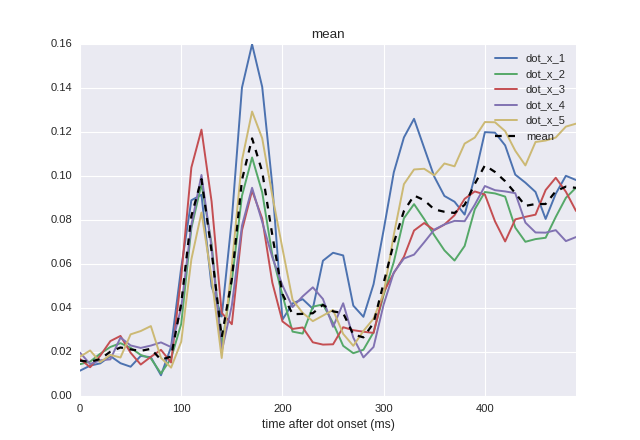

<IPython.core.display.Javascript object>


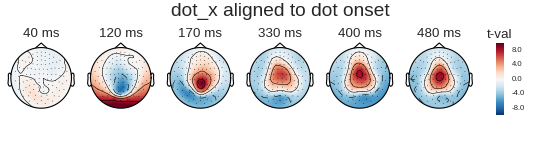

In [35]:
show_aligned_effects('dot_x', 'mean')

### dot_y

<IPython.core.display.Javascript object>


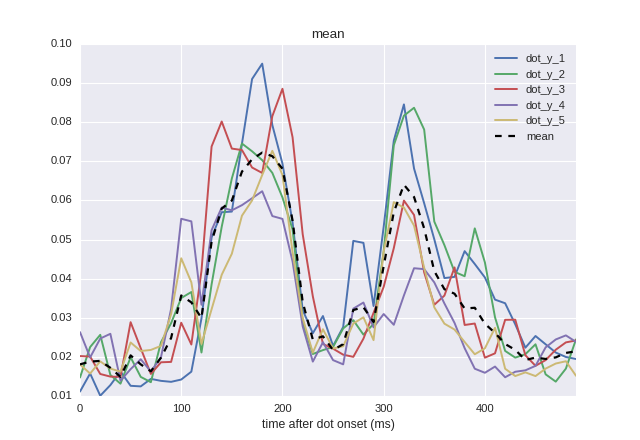

<IPython.core.display.Javascript object>


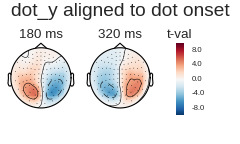

In [45]:
show_aligned_effects('dot_y', 'mean')

### Surprise

<IPython.core.display.Javascript object>


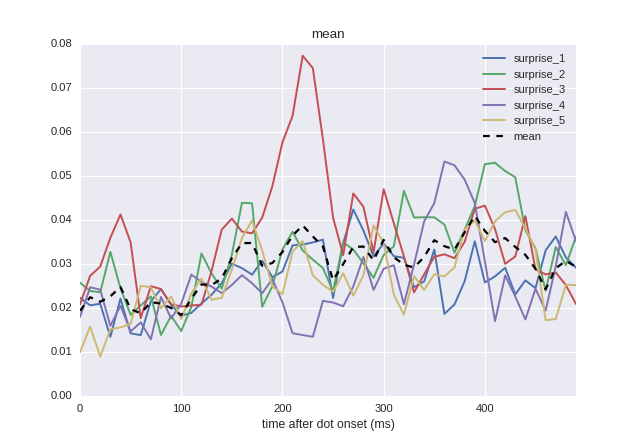

<IPython.core.display.Javascript object>


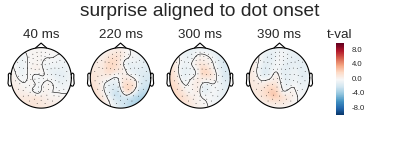

In [57]:
show_aligned_effects('surprise', 'mean')